In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# initialize the seeds of different random number generators so that the
# results will be the same every time the notebook is run
tf.random.set_seed(42)

pd.options.mode.chained_assignment = None

In [88]:
#Because each column of data represents a datapoint we will name the columns by the sequence of datapoints
# (1,2,3...140)
names = []
for i in range(140):
    names.append(i)
# The last column will be the target or dependent variable
names.append('Target')

In [89]:
# Read in the data from http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv and set the column names from the list created in the box above
# Assign the dataframe to "df"


In [90]:
# YOUR CODE HERE
df = pd.read_csv("http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv", names = names)

In [91]:
df.shape

(4998, 141)

In [92]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,Target
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [93]:
print(numerics)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139]


In [94]:
numerics = names

# Remove the dependent variable
numerics.remove('Target')

In [76]:
print(df.columns.tolist())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 'Target', 'Target']


In [95]:
# What % of the data is abnormal data?
# Set the output to "target_metrics"
# YOUR CODE HERE
# Calculate the percentage of abnormal data
abnormal_count = df[df['Target'] == 0].shape[0]
total_count = df.shape[0]
abnormal_percentage = (abnormal_count / total_count) * 100

# Set the output to "target_metrics"
target_metrics = abnormal_percentage
print(target_metrics)


41.596638655462186


In [96]:
# Extract the dependent variables
#set the dependent variables to 'y'
# YOUR CODE HERE
y = df.pop('Target')


In [97]:
# Before we normalize the numerics, let's split the data into an 80% training set and 20% test set (why should we split before normalization?).
from sklearn.model_selection import train_test_split

In [98]:
#split into train and test sets with the following naming conventions:
# X_train, X_test, y_train and y_test
# YOUR CODE HERE

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, stratify=y)

In [99]:
# Let's calculate the meanand std to "Sd"
# Assign the means to "means" and standard deviation to "sd"
# YOUR CODE HERE
means = X_train[numerics].mean()
sd = X_train [numerics].std()
print(means)

0     -0.262299
1     -1.646850
2     -2.488876
3     -3.115399
4     -3.164280
         ...   
135   -0.776564
136   -0.846756
137   -0.650555
138   -0.499843
139   -0.718621
Length: 140, dtype: float64


In [100]:

# Normalize X_train
# YOUR CODE HERE
X_train[numerics]= (X_train[numerics] - means)/sd

In [101]:
# Normalize X_test
# YOUR CODE HERE
X_test[numerics]= (X_test[numerics] - means)/sd

In [102]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
4716,0.462211,0.757237,1.146503,1.583018,1.952577,2.271533,2.528038,2.627474,2.101539,1.460126,...,-2.586084,-2.027648,-1.529531,-1.161141,-1.032060,-0.948254,-0.839398,-0.887068,-0.758108,-0.504518
4736,-0.863767,-0.475302,-0.093766,0.242031,0.523286,0.281940,0.000155,0.103264,0.320692,0.243425,...,-0.193048,-0.482687,-0.760767,-0.910485,-1.178663,-1.415151,-1.664146,-1.515409,-1.281640,-0.508634
4027,0.284650,0.366708,0.549340,0.440822,0.125140,-0.434807,-1.227500,-1.489895,-1.219326,-1.105157,...,-0.421957,-0.675722,-0.806977,-0.936318,-1.050852,-1.197032,-1.271184,-1.029635,-0.800797,0.256566
704,-1.012203,-0.847253,-0.616228,-0.585840,-0.474263,-0.482519,0.018560,0.847273,0.522839,0.430546,...,0.967214,0.742100,0.684596,0.535271,0.441890,0.482226,0.511784,0.546700,0.552877,0.277594
2584,0.341215,-0.982281,-1.393450,-1.290858,-0.445294,0.673817,1.198449,0.766246,1.210817,1.035944,...,0.819699,0.588956,0.716927,0.795553,0.768453,0.818961,1.251386,1.239216,0.581825,-1.140865


In [ ]:
# The easiest way to feed data to Keras/Tensorflow is as Numpy arrays so we convert our two dataframes to Numpy arrays.

In [103]:
# Convert X_train and X_test to Numpy arrays
# YOUR CODE HERE
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [ ]:
# If this box fails on a second attempt try recreating X_train and X_test and running the boxes before this.

In [104]:
X_train.shape, y_train.shape

((3998, 140), (3998,))

In [105]:
X_test.shape, y_test.shape

((1000, 140), (1000,))

In [129]:
#get the number of columns and assign it to "num_columns"

# YOUR CODE HERE
num_columns = X_train.shape[1]

# Define the input layer. assign it to "input"
# YOUR CODE HERE
input = keras.Input(shape=(num_columns,))


# Feed the input vector to the hidden layer. Call it "h"
# YOUR CODE HERE
h = keras.layers.Dense(16, activation="relu", name="Hidden")(input)

# Feed the output of the hidden layer to the output layer. Call it "output"
# YOUR CODE HERE
output = keras.layers.Dense(1, activation="sigmoid", name="Output")(h)

# tell Keras that this (input,output) pair is your model. Call it "model"
# YOUR CODE HERE
model = keras.Model(input, output)

In [108]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 140)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden (Dense)                       │ (None, 16)                  │           2,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,273 (8.88 KB)

 Trainable params: 2,273 (8.88 KB)

 Non-trainable params: 0 (0.00 B)

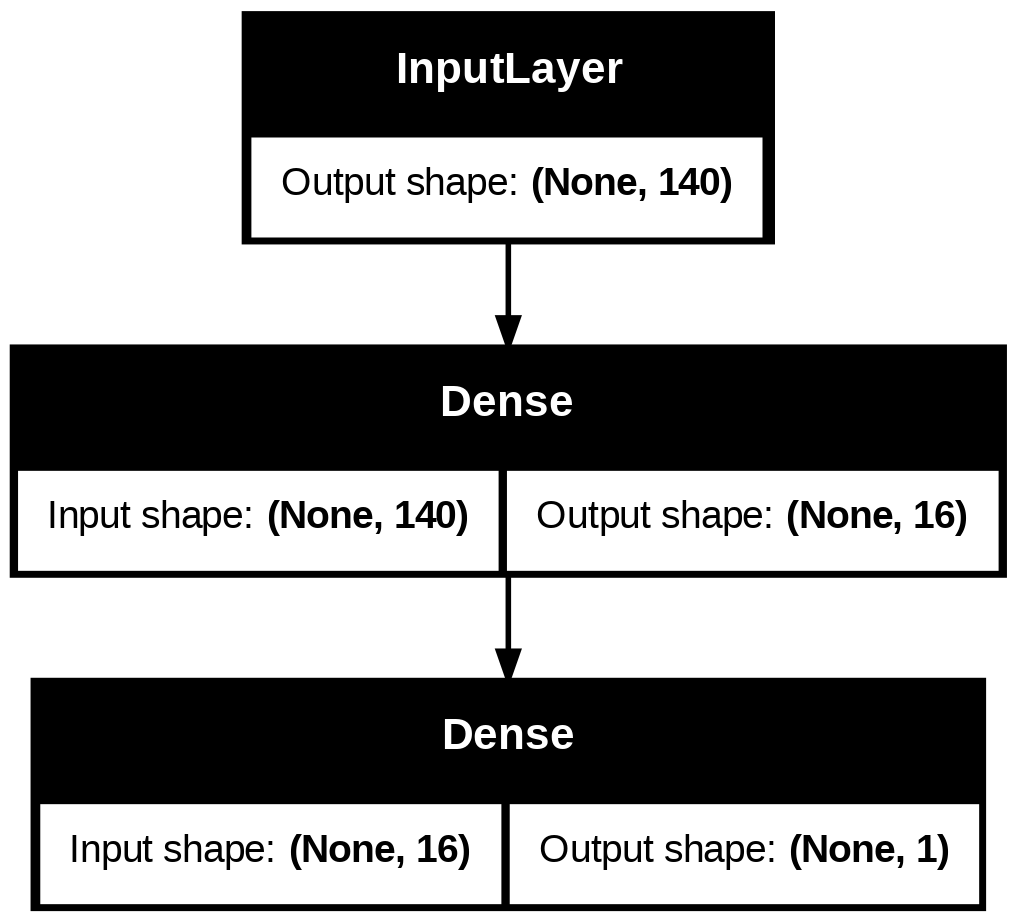

In [130]:
keras.utils.plot_model(model, show_shapes=True)

In [131]:
# Set optimization parameters
Now that the model is defined, we need to tell Keras three things:

What loss function to use - Since our output variable is binary, we will select the binary_crossentropy loss function.
Which optimizer to use - we will use a 'flavor' of SGD called Adam which is an excellent default choice
What metrics you want Keras to report out - in classification problems like this one, Accuracy is commonly used.

SyntaxError: invalid syntax (<ipython-input-131-2c2933b66362>, line 2)

In [132]:
# YOUR CODE HERE
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [133]:
# Train the model
To kickoff training, we have to decide on three things:

The batch size - 32 is a good default
The number of epochs i.e., how many passes through the training data. Start by setting this to 100, but you can experiment with different values.
Whether we want to use a validation set. This will be useful for overfitting detection and regularization via early stopping so we will ask Keras to automatically use 20% of the data points as a validation set
OK, let's train the model using the model.fit function!

SyntaxError: unterminated string literal (detected at line 7) (<ipython-input-133-82ddc7112058>, line 7)

In [134]:
# Fit your model and assign the output to "history"
# YOUR CODE HERE
history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8210 - loss: 0.3828 - val_accuracy: 0.9825 - val_loss: 0.0726
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9827 - loss: 0.0629 - val_accuracy: 0.9862 - val_loss: 0.0510
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9911 - loss: 0.0425 - val_accuracy: 0.9875 - val_loss: 0.0483
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9928 - loss: 0.0342 - val_accuracy: 0.9875 - val_loss: 0.0484
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9943 - loss: 0.0305 - val_accuracy: 0.9887 - val_loss: 0.0505
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9943 - loss: 0.0279 - val_accuracy: 0.9887 - val_loss: 0.0534
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9951 - loss: 0.0259 - val_accuracy: 0.9875 - val_loss: 0.0557
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9951 - loss: 0.0242 - val_accuracy: 0.

In [ ]:
# Let's plot the training and loss curves to see if overfitting is going on and if early stopping may be needed.

In [135]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

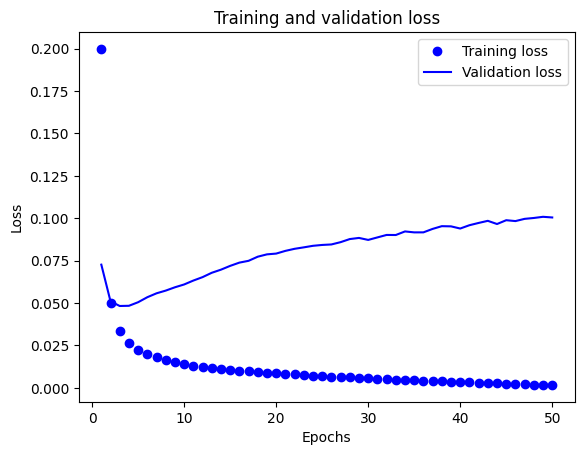

In [136]:
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# Let's look at the accuracy curves as well.

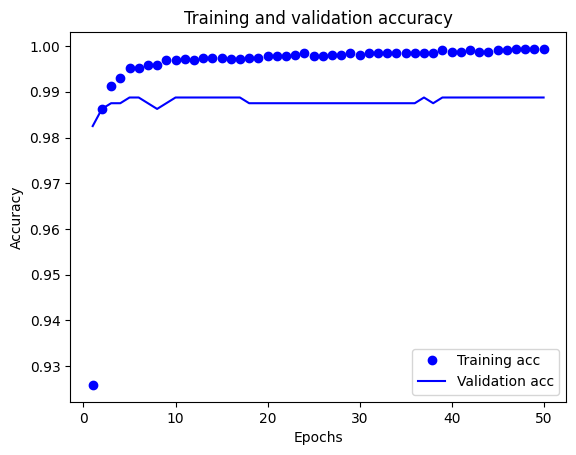

In [137]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Do you think there's overfitting?

If you think there's overfitting at epoch N, we could go back, re-initialize the model and just run it for N epochs - that would an example of early stopping.

I invite you to try exactly that and compare to the test set accuracy calculated below. Perhaps you can do better!

In [138]:
# Evaluate the model
Let's see how well the model does on the test set.

model.evaluate is a very handy function to calculate the performance of your model on any dataset.

SyntaxError: unterminated string literal (detected at line 2) (<ipython-input-138-428fe990a100>, line 2)

In [139]:
# Getting the results of your model for grading
score, acc = model.evaluate(X_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9908 - loss: 0.0986  


In [127]:
### This box will pass if your accuracy is over 97%

In [140]:
# To assess if this accuracy number is impressive, we can compare it the accuracy of a simple, baseline model.

What's a reasonable baseline model?

In [141]:
y.value_counts(normalize=True)
# If we predict 0 for every point, the accuracy will be 41.6%. So the 98.2% accuracy from our DL model is excellent!!

,proportion
Target,
1.0,0.584034
0.0,0.415966
